In [1061]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [1062]:
import pandas as pd
titanic_train = pd.read_csv('train.csv', index_col = 0)
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Removendo as colunas Name e Cabin

In [1063]:
titanic_train.drop(['Name', 'Cabin'], inplace = True, axis=1)
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.0000,S
888,1,1,female,19.0,0,0,112053,30.0000,S
889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S


Transformando o número do ticket em um valor numérico

In [1064]:
titanic_train['Ticket'] = titanic_train['Ticket'].str.replace(r'[^\d]', '')

<ipython-input-1064-a7c5b3d4488d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  titanic_train['Ticket'] = titanic_train['Ticket'].str.replace(r'[^\d]', '')


In [1065]:
titanic_train['Ticket'] = pd.to_numeric(titanic_train['Ticket'])

Removendo qualquer instância com valores faltantes

In [1066]:
titanic_train = titanic_train.dropna(axis=0)

Usando a função get_dummies para transformar variáveis categóricas como sexo e o porto de embarcação em variáveis numéricas conhecidas como variáveis dummy

In [1067]:
titanic_train = pd.get_dummies(titanic_train, columns=['Sex', 'Embarked'])
titanic_train

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,22.0,1,0,521171.0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,17599.0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,23101282.0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,113803.0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,373450.0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,39.0,0,5,382652.0,29.1250,1,0,0,1,0
887,0,2,27.0,0,0,211536.0,13.0000,0,1,0,0,1
888,1,1,19.0,0,0,112053.0,30.0000,1,0,0,0,1


**Treinando o modelo**

A profundidade máxima que a árvore pode atingir é 5 conforme determinamos usando o parâmetro max_depth

In [1068]:
X_train, X_val, y_train, y_val = train_test_split(titanic_train.values[:,1:], titanic_train.values[:,0], test_size=0.2, stratify=titanic_train.values[:,0], random_state=42)

In [1069]:
dt_titanic = DecisionTreeClassifier(max_depth=5,random_state=42)
dt_titanic.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

A acurácia do modelo foi 0.7394366197183099 usando os dados de validação

In [1070]:
y_pred = dt_titanic.predict(X_val)
accuracy_score(y_val, y_pred)

0.7394366197183099

Calculando o relatório de métricas 

In [1071]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.83      0.79        84
         1.0       0.71      0.60      0.65        58

    accuracy                           0.74       142
   macro avg       0.73      0.72      0.72       142
weighted avg       0.74      0.74      0.74       142



Exibindo a árvore de decisão criada

[Text(0.44047619047619047, 0.9166666666666666, 'x[6] <= 0.5\ngini = 0.482\nsamples = 566\nvalue = [337, 229]'),
 Text(0.16666666666666666, 0.75, 'x[1] <= 9.5\ngini = 0.324\nsamples = 364\nvalue = [290, 74]'),
 Text(0.047619047619047616, 0.5833333333333334, 'x[2] <= 2.5\ngini = 0.466\nsamples = 27\nvalue = [10, 17]'),
 Text(0.023809523809523808, 0.4166666666666667, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.07142857142857142, 0.4166666666666667, 'x[4] <= 347079.5\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.047619047619047616, 0.25, 'x[1] <= 6.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.023809523809523808, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.09523809523809523, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.2857142857142857, 0.5833333333333334, 'x[0] <= 1.5\ngini = 0.281\nsamples = 337\nvalue = [280, 57]'),
 Text(0.190

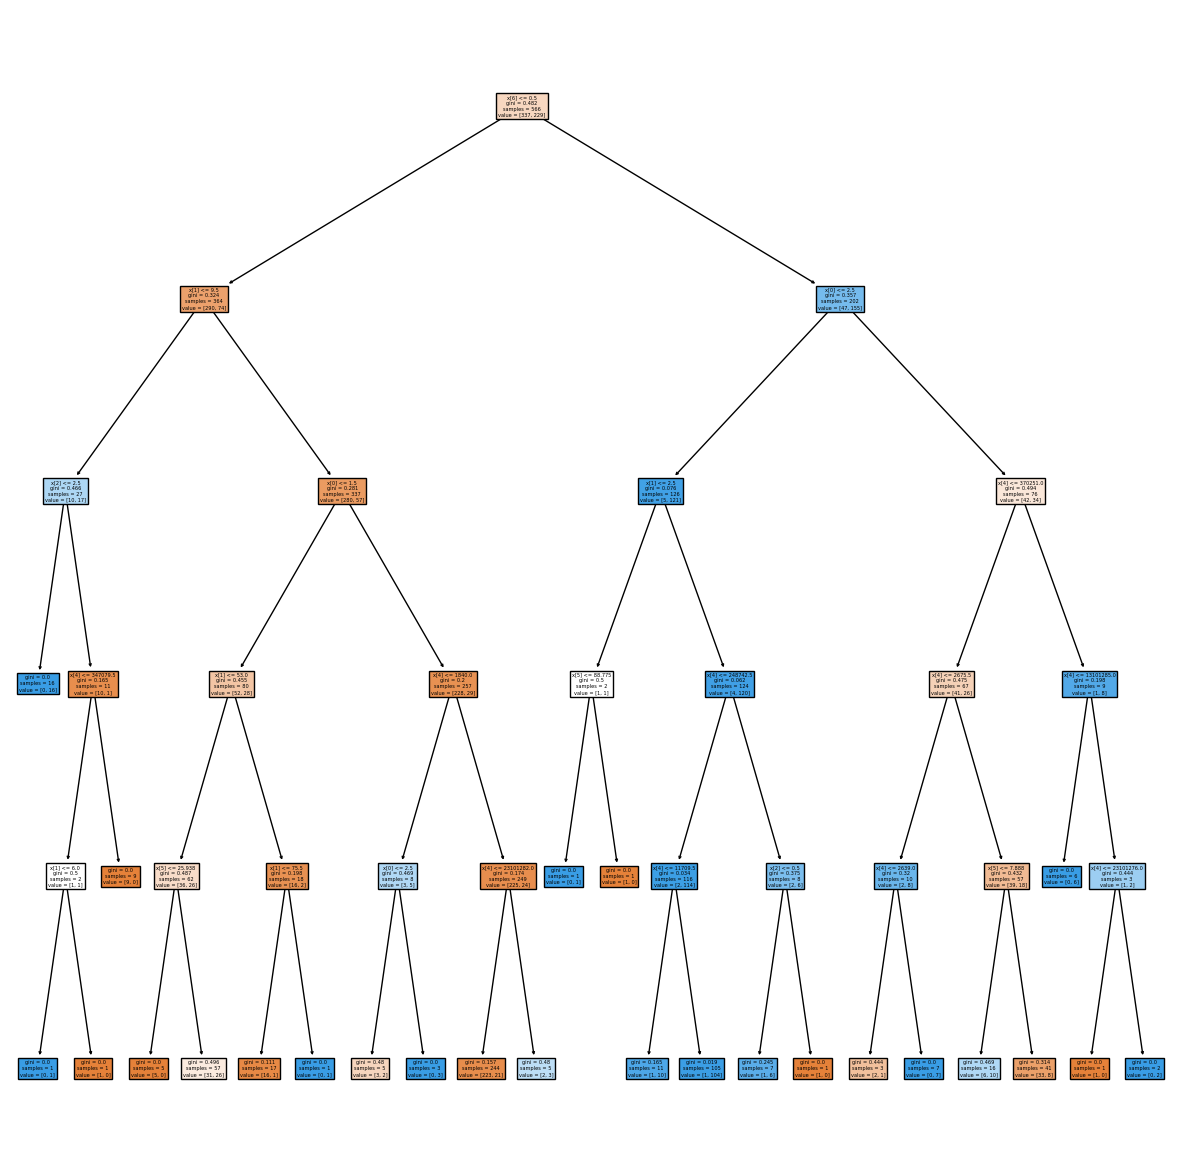

In [1072]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
tree.plot_tree(dt_titanic, filled=True)

Removendo as colunas que não contribuíram em nada para a construção da árvore

In [1073]:
f_imp = dt_titanic.feature_importances_

In [1074]:
for i, col in enumerate(titanic_train.columns.values[1:]):
  if f_imp[i] == 0:
    titanic_train.drop(col, inplace = True, axis=1)

In [1075]:
titanic_train

,Survived,Pclass,Age,SibSp,Ticket,Fare,Sex_female
PassengerId,,,,,,,
1,0,3,22.0,1,521171.0,7.2500,0
2,1,1,38.0,1,17599.0,71.2833,1
3,1,3,26.0,0,23101282.0,7.9250,1
4,1,1,35.0,1,113803.0,53.1000,1
5,0,3,35.0,0,373450.0,8.0500,0
...,...,...,...,...,...,...,...
886,0,3,39.0,0,382652.0,29.1250,1
887,0,2,27.0,0,211536.0,13.0000,0
888,1,1,19.0,0,112053.0,30.0000,1


Treinando o modelo apenas com as colunas que sobraram

In [1076]:
X_train, X_val, y_train, y_val = train_test_split(titanic_train.values[:,1:], titanic_train.values[:,0], test_size=0.2, stratify=titanic_train.values[:,0], random_state=42)

In [1077]:
dt_titanic = DecisionTreeClassifier(max_depth=5,random_state=42)
dt_titanic.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Podemos perceber que a acurácia é a mesma, pois apenas removemos as colunas que não contribuíram de forma nenhuma

In [1078]:
y_pred = dt_titanic.predict(X_val)
accuracy_score(y_val, y_pred)

0.7394366197183099

O relatório de métricas também permaneceu o mesmo

In [1079]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.83      0.79        84
         1.0       0.71      0.60      0.65        58

    accuracy                           0.74       142
   macro avg       0.73      0.72      0.72       142
weighted avg       0.74      0.74      0.74       142



Também podemos perceber que a árvore permaneceu a mesma

[Text(0.44047619047619047, 0.9166666666666666, 'x[5] <= 0.5\ngini = 0.482\nsamples = 566\nvalue = [337, 229]'),
 Text(0.16666666666666666, 0.75, 'x[1] <= 9.5\ngini = 0.324\nsamples = 364\nvalue = [290, 74]'),
 Text(0.047619047619047616, 0.5833333333333334, 'x[2] <= 2.5\ngini = 0.466\nsamples = 27\nvalue = [10, 17]'),
 Text(0.023809523809523808, 0.4166666666666667, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.07142857142857142, 0.4166666666666667, 'x[3] <= 347079.5\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.047619047619047616, 0.25, 'x[3] <= 174610.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.023809523809523808, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09523809523809523, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.2857142857142857, 0.5833333333333334, 'x[0] <= 1.5\ngini = 0.281\nsamples = 337\nvalue = [280, 57]'),
 Text(

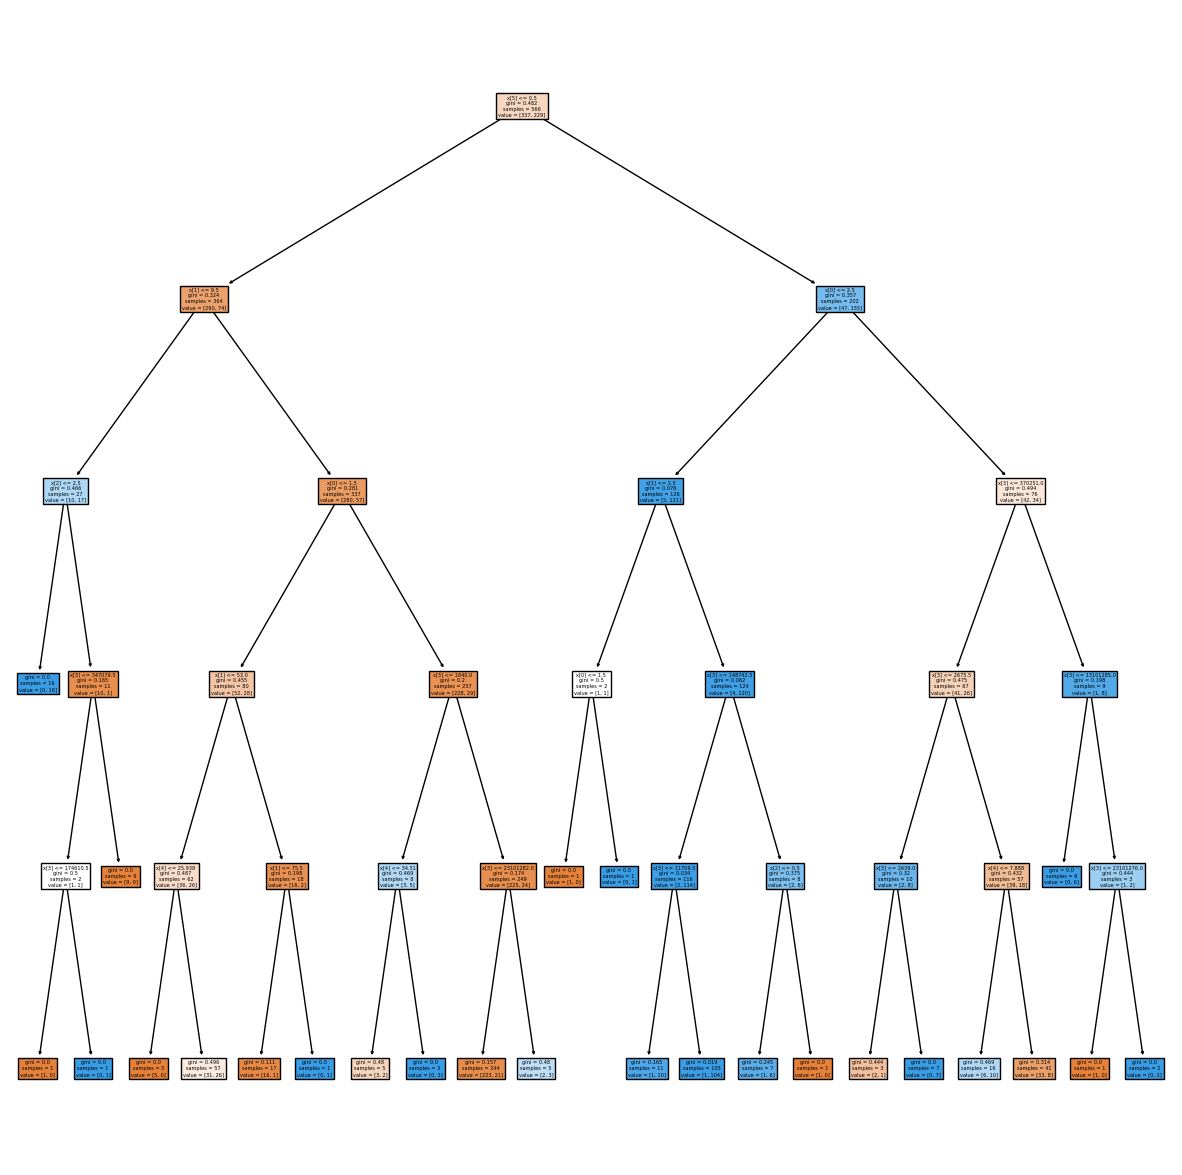

In [1080]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
tree.plot_tree(dt_titanic, filled=True)

In [1081]:
titanic_test = pd.read_csv('test.csv', index_col = 0)
titanic_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Tudo que foi feito com os dados de treino precisa ser feito com os dados de teste

In [1082]:
titanic_test.drop(['Name', 'Cabin'], inplace = True, axis=1)
titanic_test['Ticket'] = titanic_test['Ticket'].str.replace(r'[^\d]', '')
titanic_test['Ticket'] = pd.to_numeric(titanic_test['Ticket'])
titanic_test = pd.get_dummies(titanic_test, columns=['Sex', 'Embarked'])

<ipython-input-1082-7ac76d1bdf8a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  titanic_test['Ticket'] = titanic_test['Ticket'].str.replace(r'[^\d]', '')


In [1083]:
for i, col in enumerate(titanic_test.columns.values):
  if f_imp[i] == 0:
    titanic_test.drop(col, inplace = True, axis=1)

Usando uma estimativa de idade para as instâncias que não contêm idade

In [1084]:
for i, age in enumerate(titanic_test['Age'].values):
  if pd.isna(age):
    titanic_test['Age'].iloc[i] = round(titanic_test['Age'].mean(),1) - (round(titanic_test['Age'].mean(),1) - int(round(titanic_test['Age'].mean(),1))) +0.5

<ipython-input-1084-6d2c955b07c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_test['Age'].iloc[i] = round(titanic_test['Age'].mean(),1) - (round(titanic_test['Age'].mean(),1) - int(round(titanic_test['Age'].mean(),1))) +0.5


Usando uma estimativa de fare para as instâncias que não contêm fare

In [1085]:
for i, fare in enumerate(titanic_test['Fare'].values):
  if pd.isna(fare):
    titanic_test['Fare'].iloc[i] = titanic_test['Fare'][titanic_test['Pclass'] == titanic_test['Pclass'].iloc[i]].mean()

<ipython-input-1085-a18f7d6e0f3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_test['Fare'].iloc[i] = titanic_test['Fare'][titanic_test['Pclass'] == titanic_test['Pclass'].iloc[i]].mean()


In [1086]:
titanic_test

,Pclass,Age,SibSp,Ticket,Fare,Sex_female
PassengerId,,,,,,
892,3,34.5,0,330911,7.8292,0
893,3,47.0,1,363272,7.0000,1
894,2,62.0,0,240276,9.6875,0
895,3,27.0,0,315154,8.6625,0
896,3,22.0,1,3101298,12.2875,1
...,...,...,...,...,...,...
1305,3,30.5,0,53236,8.0500,0
1306,1,39.0,0,17758,108.9000,1
1307,3,38.5,0,3101262,7.2500,0


Criando o arquivo csv com as predições

In [1087]:
y_pred = dt_titanic.predict(titanic_test.values)

In [1088]:
predicoes = pd.DataFrame(index=titanic_test.index.values)

In [1089]:
predicoes.index.name = 'PassengerId'

In [1090]:
predicoes

""
PassengerId
892
893
894
895
896
...
1305
1306
1307


In [1091]:
predicoes.insert(0, 'Survived', 0)
for i, v in enumerate(y_pred):
  predicoes['Survived'].iloc[i] = v

In [1092]:
predicoes

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [1093]:
predicoes.to_csv('resultado.csv')

Submetendo o arquivo csv na plataforma Kaggle, obtemos uma acurácia de 0.7799

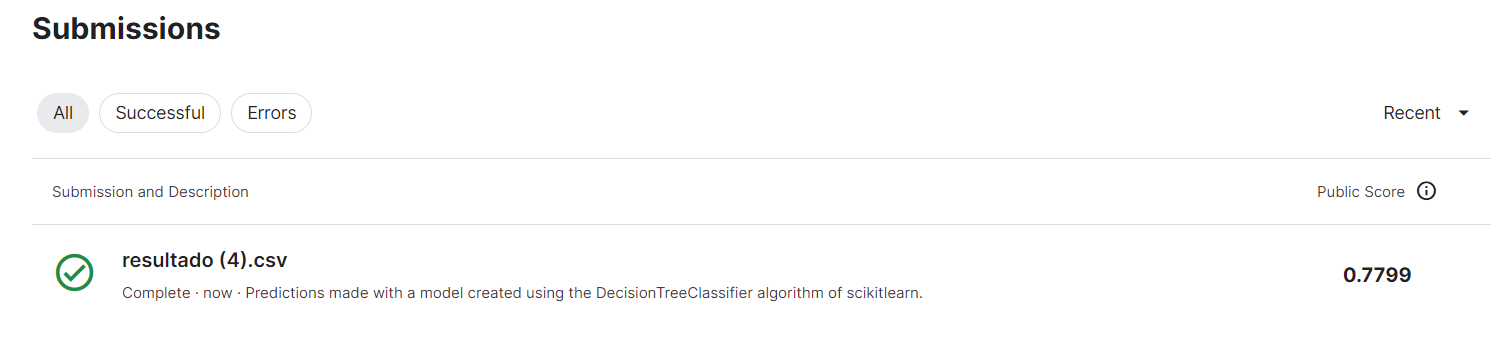

In [1094]:
from IPython.display import Image
Image('/content/SubmissionKaggle.png')